In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import missingno as msno

In [2]:
df=pd.read_csv('/kaggle/input/traumaticdataviz/Dataset_TBI_2.csv', sep=';')

print('Data shape: ', df.shape)
df.head()

Data shape:  (102, 18)


,Subject,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,S1,76,M,V,MCS,10,3,18,-175,0,3,DEATH,NaN,NaN,30.0,NaN,NaN,1
1,S2,28,M,III,MCS,8,3,20,-125,0,2,EMERSION,23.0,7.0,8.0,0.0,60.0,4
2,S3,20,F,II,MCS,9,3,18,-175,0,2,EMERSION,23.0,7.0,6.0,0.0,70.0,4
3,S4,22,M,II,EMERSION,23,4,15,-175,0,3,EMERSION,23.0,7.0,3.0,0.0,100.0,7
4,S5,62,M,II,EMERSION,23,4,15,-100,5,3,EMERSION,23.0,6.0,10.0,-50.0,90.0,3


<Axes: >

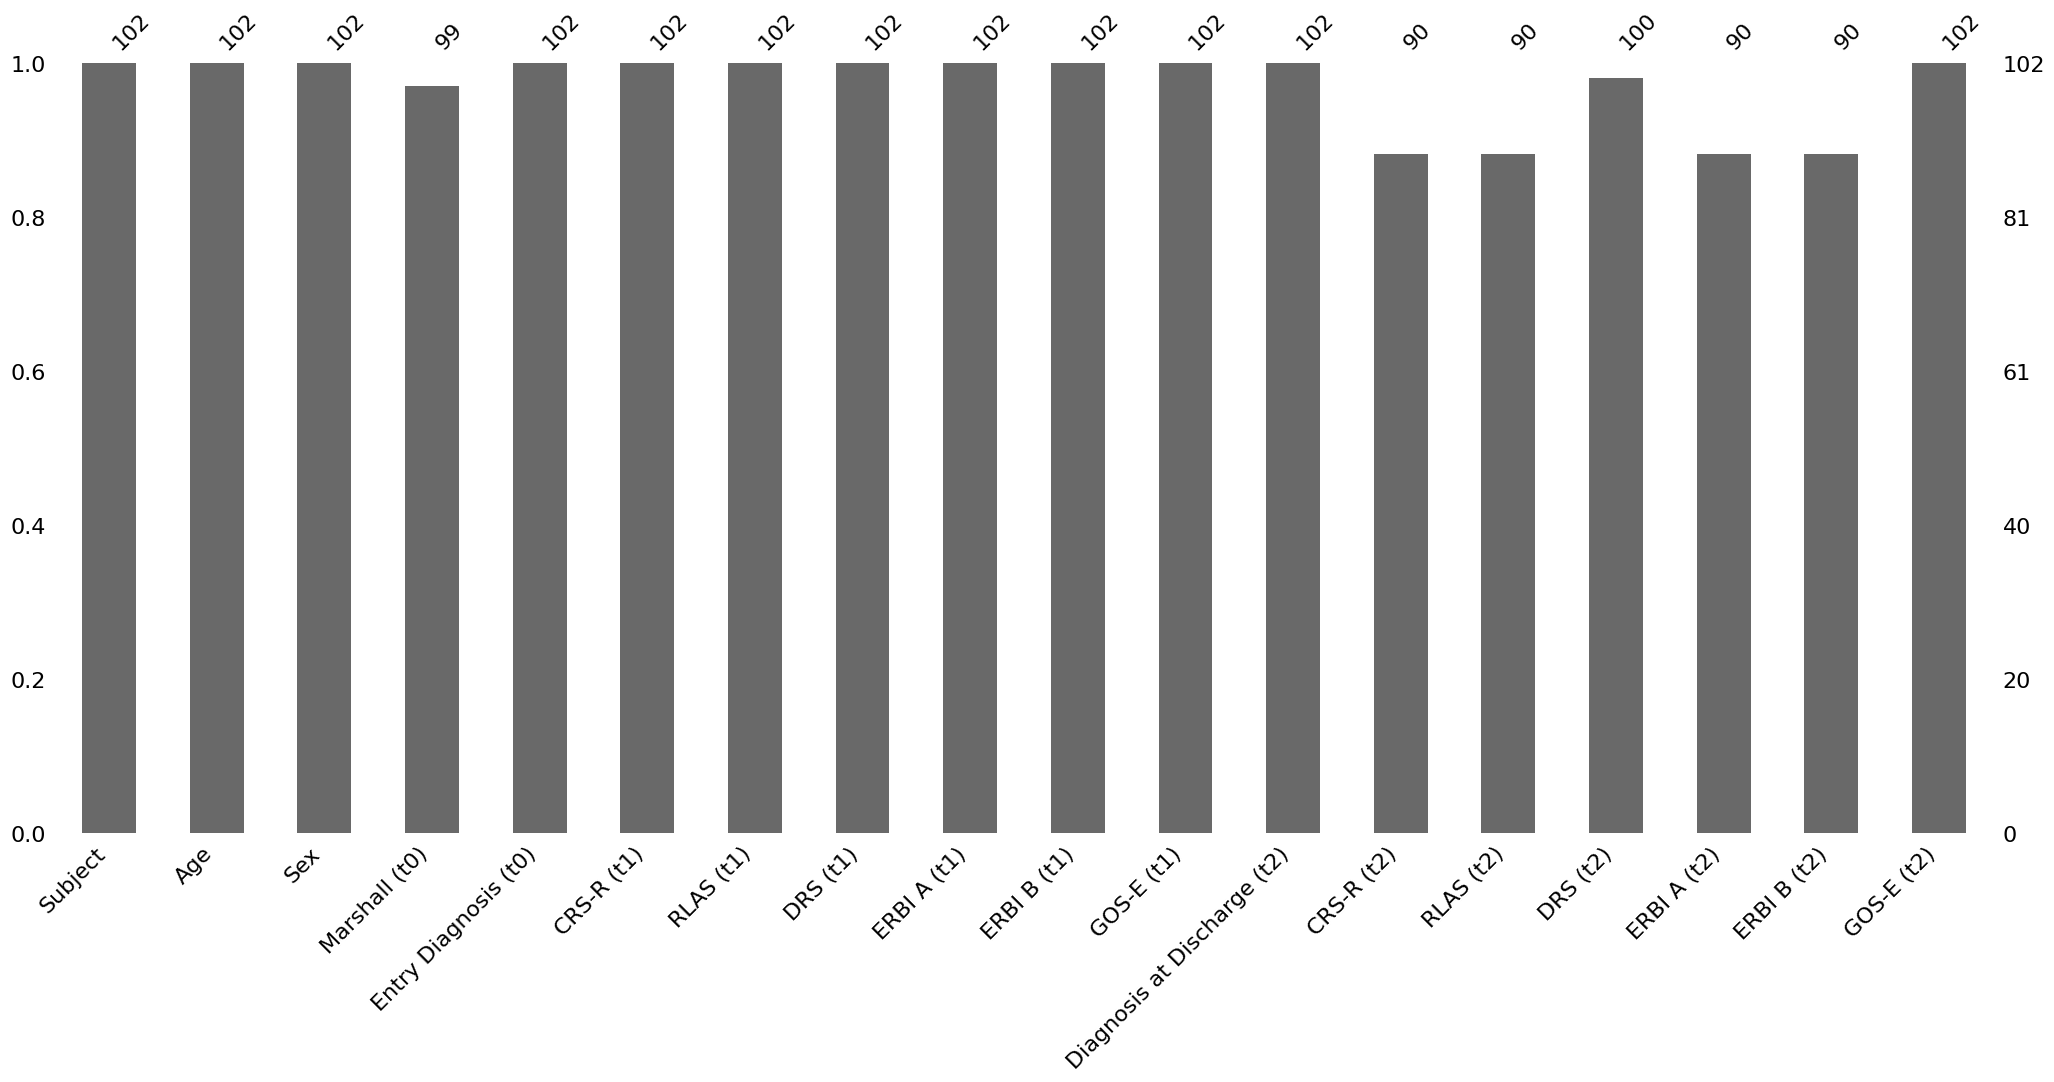

In [3]:
import missingno as msno
import pandas as pd

%matplotlib inline
msno.bar(df)

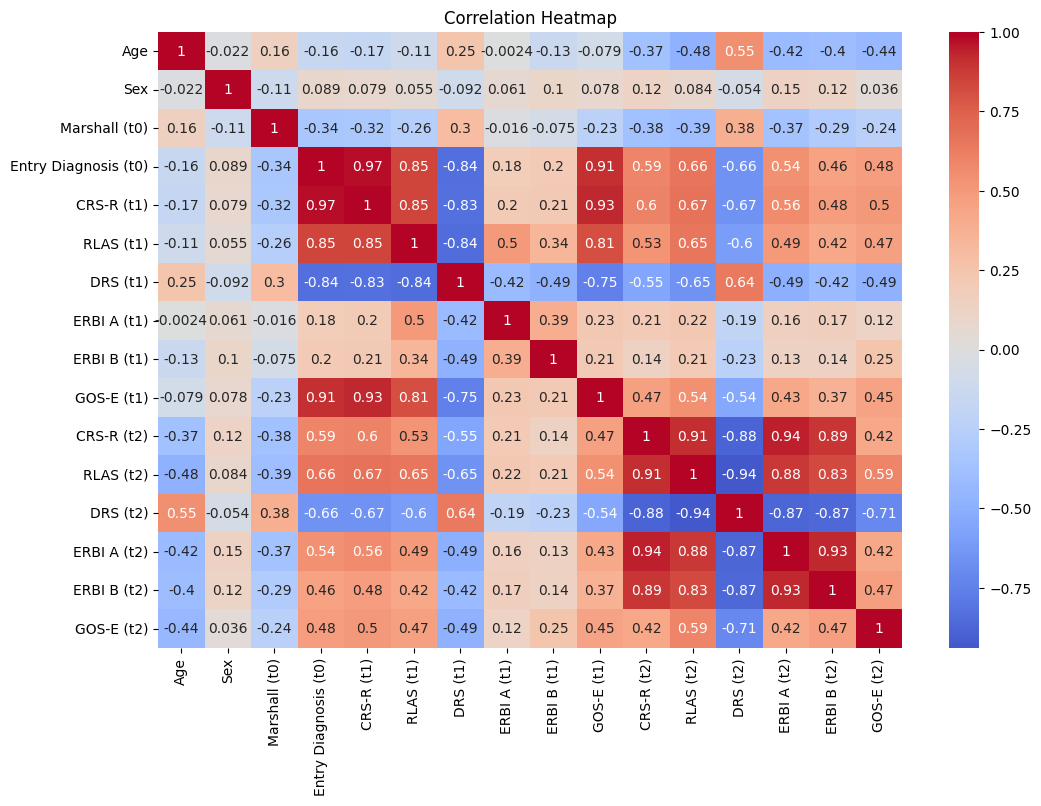


Missing values after imputation:
Series([], dtype: int64)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['Marshall (t0)'] = df['Marshall (t0)'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
df['Entry Diagnosis (t0)'] = df['Entry Diagnosis (t0)'].map({'VS': 1, 'MCS': 2, 'EMERSION': 3})


df = df.drop(columns=['Subject'])
df = df.drop(columns=['Diagnosis at Discharge (t2)'])

# convert GOS-E (t2) to binary classification: >= 5 is 1, < 5 is 0
df['GOS-E (t2)'] = df['GOS-E (t2)'].apply(lambda x: 1 if x >= 5 else 0)


# fill Marshall (t0) with mode
df['Marshall (t0)'] = df['Marshall (t0)'].fillna(df['Marshall (t0)'].mode()[0])

# worst scores for column with missing data
worst_scores = {
    'ERBI A (t1)': -325,
    'ERBI B (t1)': -325,
    'ERBI A (t2)': -325,
    'ERBI B (t2)': -325,
    'DRS (t2)': 29,
    'RLAS (t2)': 1,
    'CRS-R (t2)': 0
}

# fill the missing values with the worst scores
for col, worst_score in worst_scores.items():
    df[col] = df[col].fillna(worst_score)

# calculate the correlation matrix
corr_matrix = df.corr()

# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


# check for missing values left
missing_values_after_imputation = df.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after_imputation[missing_values_after_imputation > 0])

df.to_csv('filledata.csv', index=False)


<Axes: >

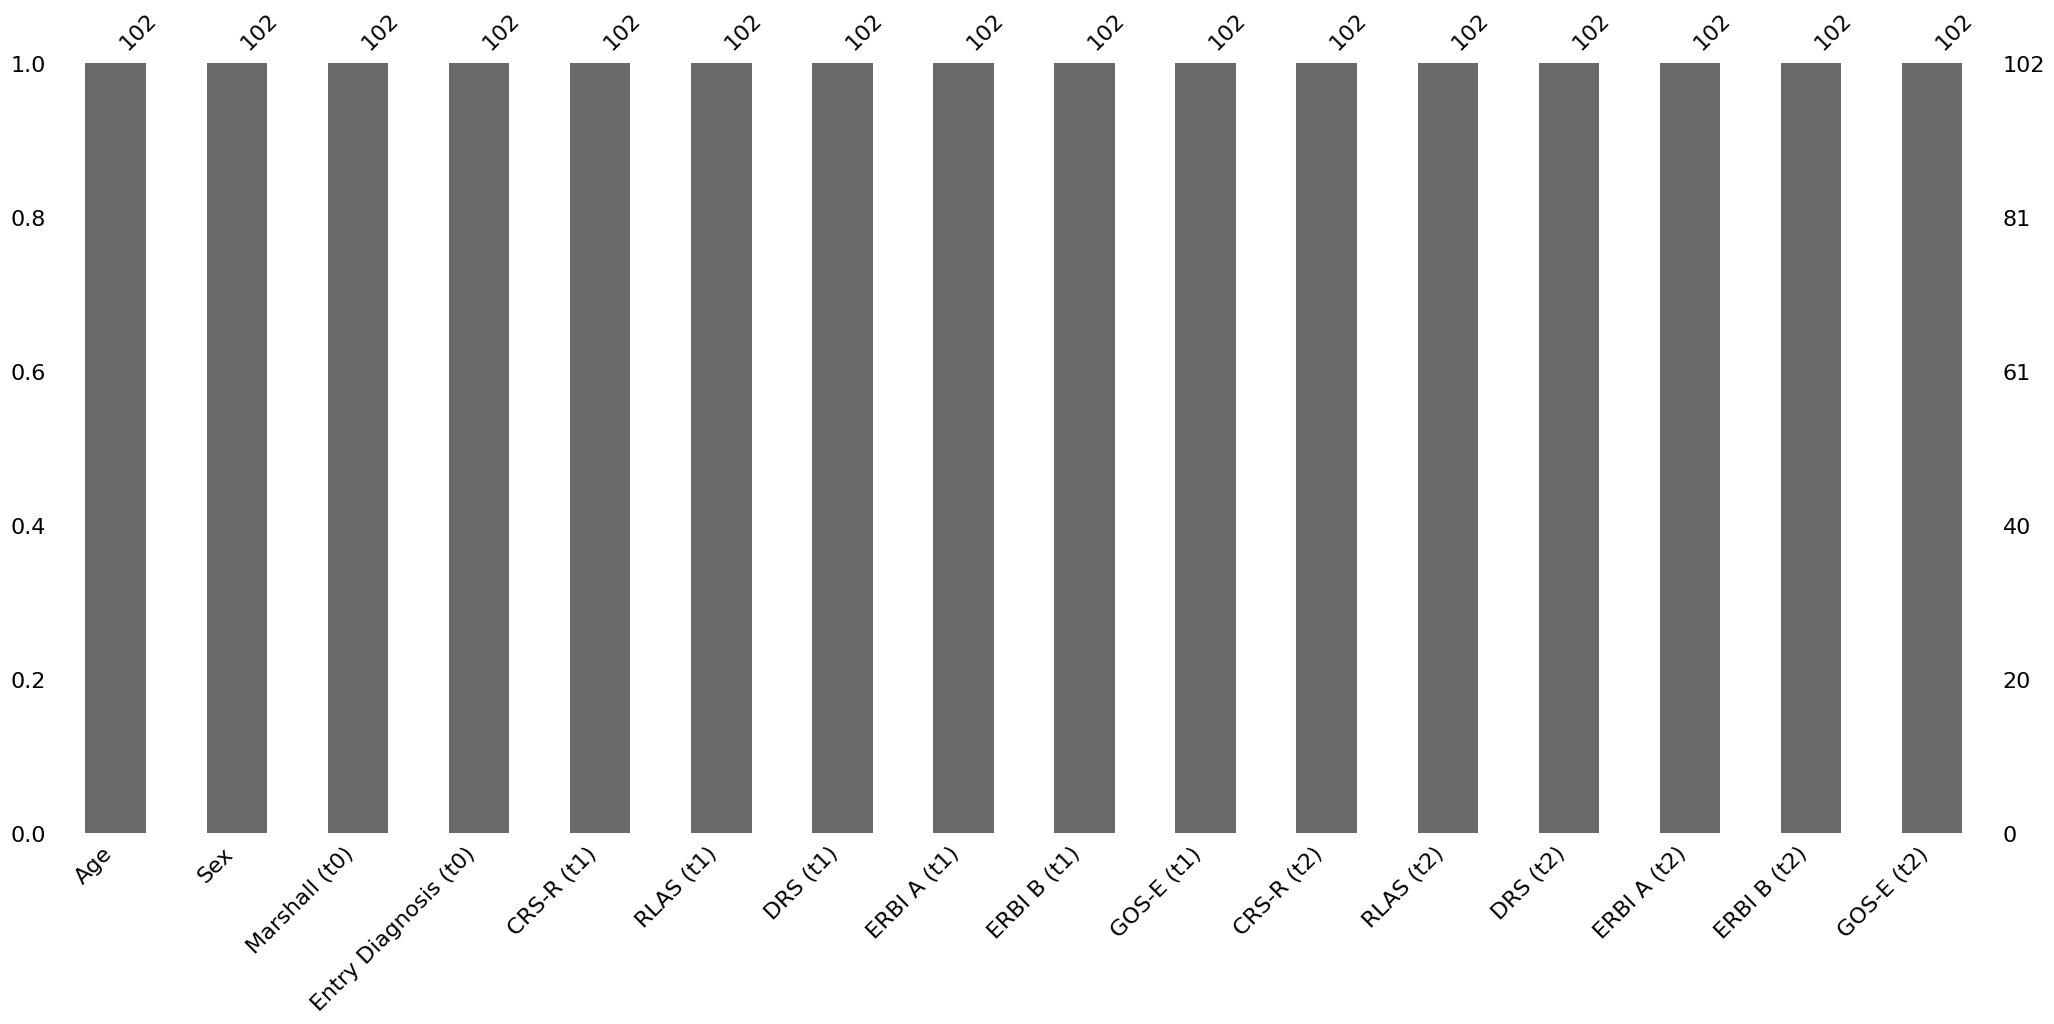

In [5]:
%matplotlib inline
msno.bar(df)